In [10]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [11]:
import pylab

In [12]:
def plotData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')

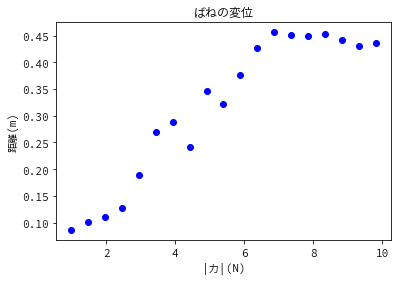

In [13]:
plotData('springData.txt')

In [14]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')

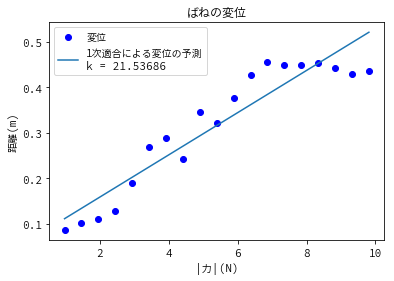

In [15]:
fitData('springData.txt')

In [16]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a * forces ** 3 + b * forces ** 2 + c * forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = u'3次適合')
    
    pylab.legend(loc = 'best')

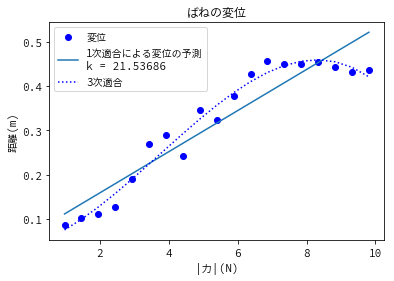

In [17]:
fitData('springData.txt')

指練習

In [18]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    xes = pylab.array(range(1, 15))
    predictedDistances = a * xes ** 3 + b * xes ** 2 + c * xes + d
    pylab.plot(xes, predictedDistances, 'b:', label = u'3次適合')
    pylab.xlim(0, 16)
    
    pylab.legend(loc = 'best')

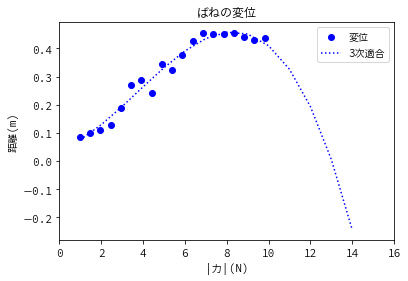

In [19]:
fitData('springData.txt')

In [20]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    masses = pylab.array(masses[:-6])
    distances = pylab.array(distances[:-6])
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a * forces ** 3 + b * forces ** 2 + c * forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = u'3次適合')
    
    pylab.legend(loc = 'best')

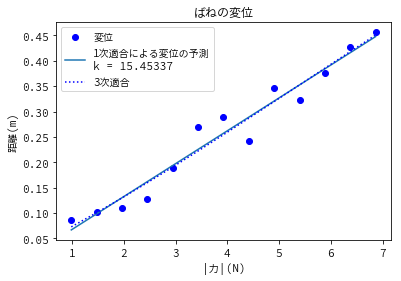

In [21]:
fitData('springData.txt')

In [22]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [], [], [], []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

In [36]:
def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における平均高さをもつ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights / len(heights)
    
    pylab.title(u'発射体の軌跡(' + str(numTrials) + u'回試行の平均)')
    pylab.xlabel(u'発射地点からの距離(インチ)')
    pylab.ylabel(u'発射地点からの高さ(インチ)')
    pylab.plot(distances, meanHeights, 'bo')
    
    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a * distances + b
    pylab.plot(distances, altitudes, 'b', label = u'線形適合')
    
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a * distances * distances + b * distances + c
    pylab.plot(distances, altitudes, 'b:', label = u'2次適合')
    pylab.legend()

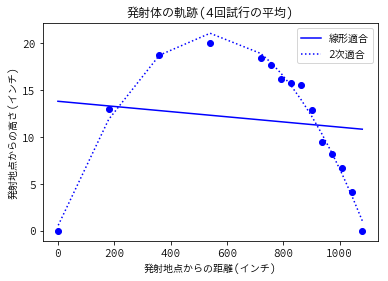

In [37]:
processTrajectories('trajectoryData.txt')

In [29]:
def rSquared(measured, predicted):
    """measuredは観測値を保持する1次元配列
       predictedは予測値を保持する1次元の配列と仮定する
       決定係数を返す"""
    estimateError = ((predicted - measured) ** 2).sum()
    meanOfMeasured = measured.sum() / float(len(measured))
    variability = ((measured - meanOfMeasured) ** 2).sum()
    return 1 - estimateError / variability

In [34]:
def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における平均高さをもつ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights / len(heights)
    pylab.title(u'発射体の軌跡(' + str(numTrials) + u'回試行の平均)')
    pylab.xlabel(u'発射地点からの距離(インチ)')
    pylab.ylabel(u'発射地点からの高さ(インチ)')
    pylab.plot(distances, meanHeights, 'bo')

    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a * distances + b
    print '1次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b', label = u'線形適合')
    
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a * distances * distances + b * distances + c
    print '2次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b:', label = u'2次適合')
    pylab.legend()

1次適合のR^2 = 0.0177433205440769
2次適合のR^2 = 0.9857653692869693


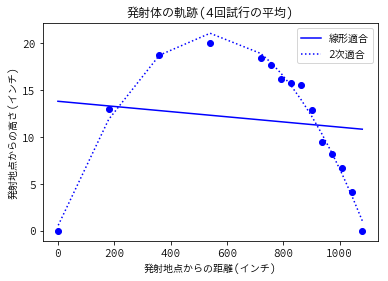

In [35]:
processTrajectories('trajectoryData.txt')